----

# PROJEKT 2. PORÓWNANIE KLASYCZNYCH MODELI UCZENIA MASZYNOWEGO I SZTUCZNYCH SIECI NEURONOWYCH (MLP) ZASTSOWANYCH DO ROZWIĄZANIA KONKRETNYCH PROBLEMÓW

## BLOK 6

### Autorzy Michał Muzykant, Adam Wowra, Filip Twardawa

----

```

```

#### Cel:

```
Celem projektu jest przewidzenie poziomu emisji dwutlenku węgla (CO₂) przez pojazdy w zależności od ich charakterystyk za pomocą algorytmów uczenia maszynowego, wraz z analizą zbioru danych i porównaniem skuteczności zastosowanych technik predykcyjnych.
```

```

```

#### Materiały:

```
Zestaw danych "CO2 Emission by Vehicles" zawiera informacje na temat
emisji dwutlenku węgla przez różne pojazdy w zależności od ich cech.

Główne cechy zestawu danych:
- Producent pojazdu: Marka pojazdu, np. Ford, BMW, Toyota.
- Model pojazdu: Konkretna nazwa modelu pojazdu.
- Rok produkcji: Rok, w którym pojazd został wyprodukowany.
- Typ paliwa: Rodzaj używanego paliwa, np. benzyna, diesel, elektryczny.
- Pojemność silnika: Pojemność silnika wyrażona w litrach.
- Zużycie paliwa: Średnie zużycie paliwa przez pojazd, zazwyczaj podawane w litrach na 100 kilometrów.
- Emisja CO₂: Ilość emitowanego dwutlenku węgla, zazwyczaj wyrażona w gramach na kilometr.
```

```


```

----

```

```

### Przygotowanie Danych

----

In [ ]:
#pip install numpy pandas matplotlib seaborn scipy plotly-express scikit-learn keras pip install tensorflow

>Biblioteki

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as stats
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

>Wczytanie Danych

In [ ]:
df = pd.read_csv('CO2-Emissions_Canada.csv')
df = df.drop_duplicates()
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3873,JAGUAR,F-TYPE S COUPE AWD,TWO-SEATER,3.0,6,AS8,Z,13.0,9.2,11.3,25,265
4508,BMW,X6 M,SUV - STANDARD,4.4,8,AS8,Z,16.6,12.1,14.6,19,341
282,CHRYSLER,200 SEDAN FFV,MID-SIZE,3.6,6,A6,E,17.0,11.2,14.4,20,230
2814,JEEP,GRAND CHEROKEE SRT 4X4 (MDS),SUV - STANDARD,6.4,8,A8,Z,18.5,12.6,15.8,18,370
4631,CHEVROLET,TRAX,SUV - SMALL,1.4,4,AS6,X,9.3,7.2,8.3,34,194
275,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28,232
6984,JAGUAR,F-TYPE P300 Convertible,TWO-SEATER,2.0,4,AS8,Z,10.2,7.8,9.2,31,215
2943,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,8.9,7.1,8.1,35,190
4283,TOYOTA,CAMRY HYBRID LE,MID-SIZE,2.5,4,AV,X,5.6,6.2,5.9,48,137
6663,CADILLAC,CT5-V AWD,MID-SIZE,3.0,6,AS10,Z,13.8,9.4,11.8,24,276


>Zastąpienie oryginalnych nazw kolumn bardziej czytelnymi i uproszczonymi nazwami

In [ ]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

>Brakujące Dane

In [ ]:
df.isnull().sum()

,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel_type,0
fuel_cons_city,0
fuel_cons_hwy,0
fuel_cons_comb,0


**Brak pustych wartości**

>Podstawowe statystyki

In [ ]:
df.describe()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


>Przegląd struktury danych

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                7385 non-null   object 
 1   model               7385 non-null   object 
 2   vehicle_class       7385 non-null   object 
 3   engine_size         7385 non-null   float64
 4   cylinders           7385 non-null   int64  
 5   transmission        7385 non-null   object 
 6   fuel_type           7385 non-null   object 
 7   fuel_cons_city      7385 non-null   float64
 8   fuel_cons_hwy       7385 non-null   float64
 9   fuel_cons_comb      7385 non-null   float64
 10  fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                 7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


>Wykres kolumnowy 20 najczęściej występujących modeli samochodów

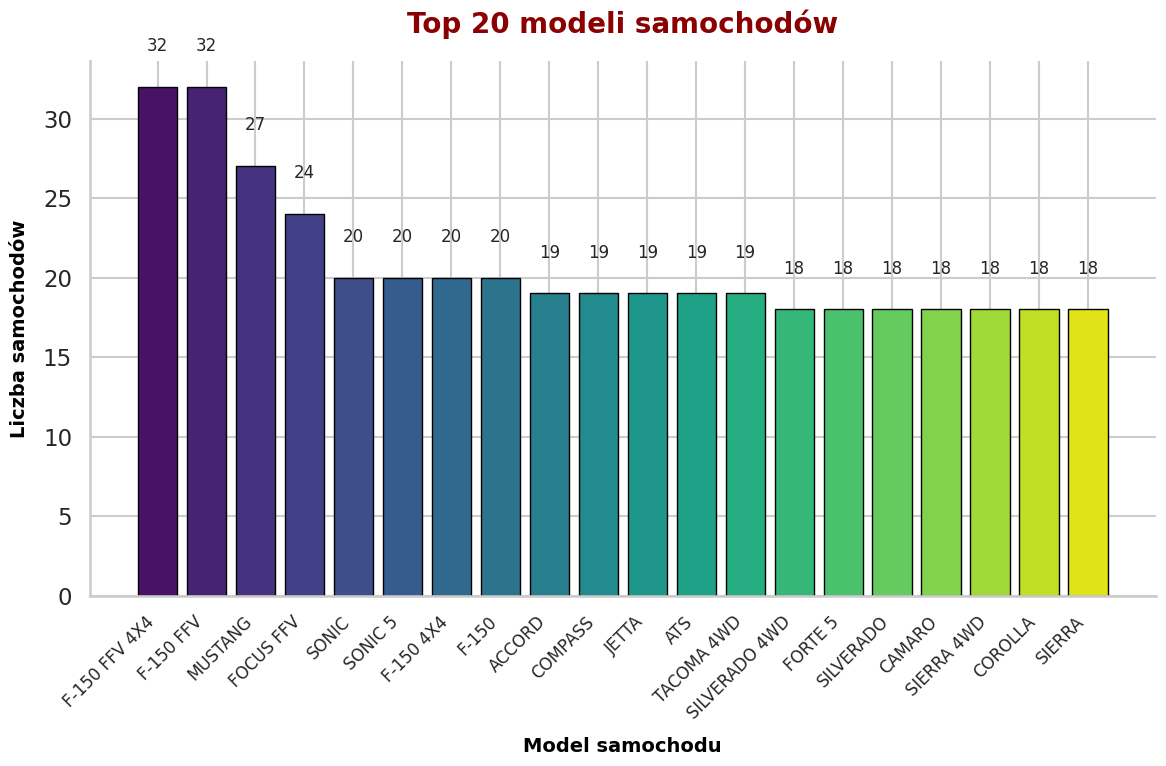

In [ ]:
# Ustawienie stylu wykresu
sns.set_theme(style="whitegrid", context="talk")

# Rozmiar i układ wykresu
fig, ax = plt.subplots(figsize=(12, 8))

# Dane i wykres
counts = df.model.value_counts().sort_values(ascending=False).head(20)
bars = ax.bar(counts.index, counts.values, color=sns.color_palette("viridis", len(counts)), edgecolor="black", linewidth=1)

# Tytuł i etykiety osi
ax.set_title("Top 20 modeli samochodów", fontsize=20,weight='bold', color='darkred', pad=20)
ax.set_xlabel("Model samochodu", fontsize=14, labelpad=10, weight='bold', color='black')
ax.set_ylabel("Liczba samochodów", fontsize=14, labelpad=10, weight='bold', color='black')

# Rotacja etykiet osi X i ich dostosowanie
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index, rotation=45, ha="right", fontsize=12)

# Etykiety słupków
for bar, count in zip(bars, counts.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, str(count),
            ha='center', va='bottom', fontsize=12)

# Usunięcie górnej i prawej ramki wykresu dla estetyki
sns.despine()

# Automatyczne dostosowanie marginesów
fig.tight_layout()

plt.show()


>Kodowanie kategorycznych zmiennych w zbiorze danych na liczby całkowite

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_labeled = df.copy()

categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

print(df_labeled.head())

   make  model  vehicle_class  engine_size  cylinders  transmission  \
0     0   1057              0          2.0          4            14   
1     0   1057              0          2.4          4            25   
2     0   1058              0          1.5          4            22   
3     0   1233             11          3.5          6            15   
4     0   1499             11          3.5          6            15   

   fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
0          4             9.9            6.7             8.5   
1          4            11.2            7.7             9.6   
2          4             6.0            5.8             5.9   
3          4            12.7            9.1            11.1   
4          4            12.1            8.7            10.6   

   fuel_cons_comb_mpg  co2  
0                  33  196  
1                  29  221  
2                  48  136  
3                  25  255  
4                  27  244  


>Macierz korelacji między zmiennymi w zbiorze danych

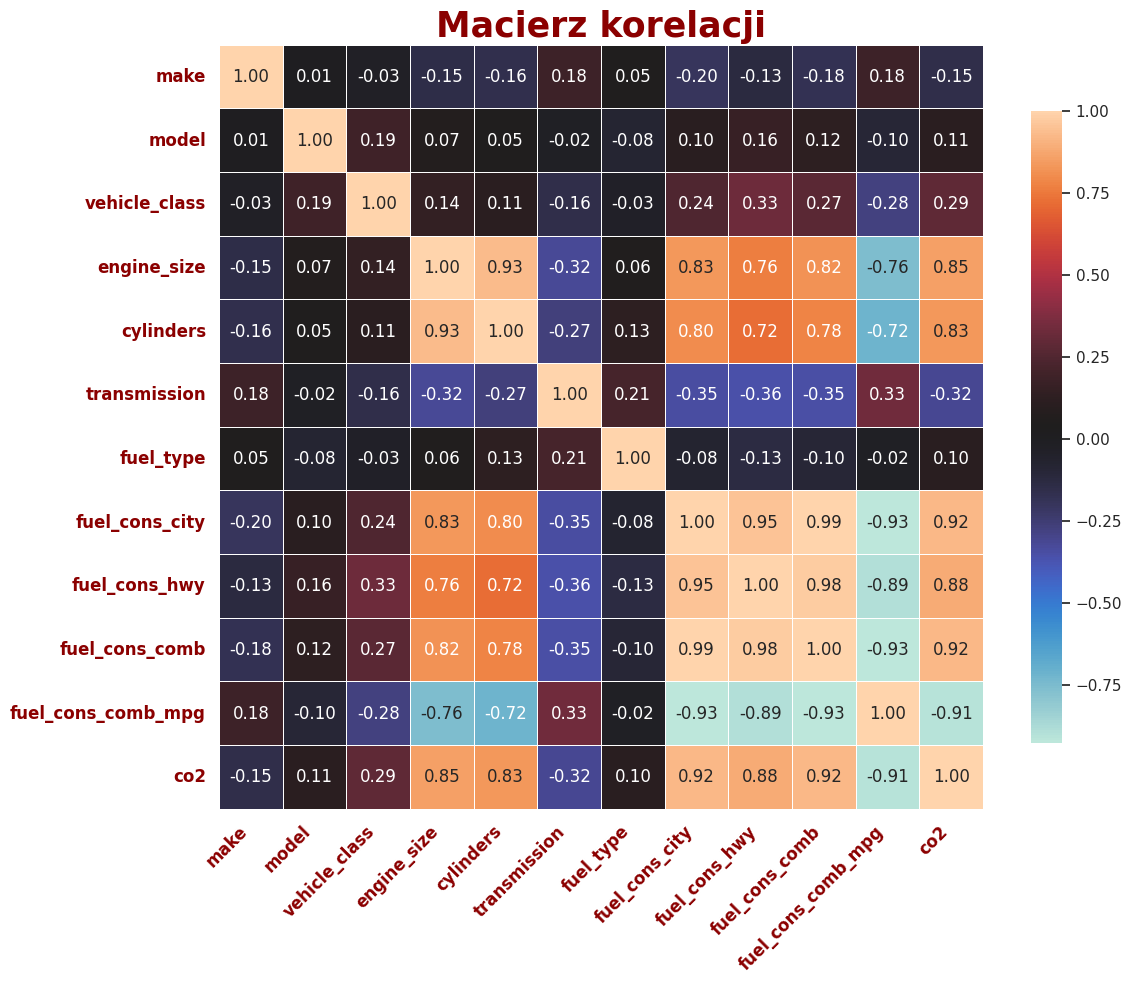

In [ ]:
# Macierz korelacji
correlation_matrix = df_labeled.corr()

# Tworzenie wykresu
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Zaawansowana mapa cieplna
sns.heatmap(
    correlation_matrix,
    annot=True,                   # Wyświetlanie wartości
    fmt=".2f",                    # Format wartości liczbowych
    cmap="icefire",              # Kolory mapy cieplnej
    cbar_kws={"shrink": 0.8},     # Mniejsze pole kolorowego paska
    linewidths=0.5,               # Odstępy pomiędzy komórkami
    square=True                   # Kwadratowe komórki
)

# Tytuł i etykiety
plt.title('Macierz korelacji', fontsize=25, weight='bold', color='darkred')
plt.xticks(fontsize=12, rotation=45, weight='bold',color='darkred', ha="right")
plt.yticks(fontsize=12, rotation=0, weight='bold', color='darkred')
plt.tight_layout()

# Wyświetlanie wykresu
plt.show()

>Wykresy histogramów dla wszystkich zmiennych liczbowych z krzywą gęstości

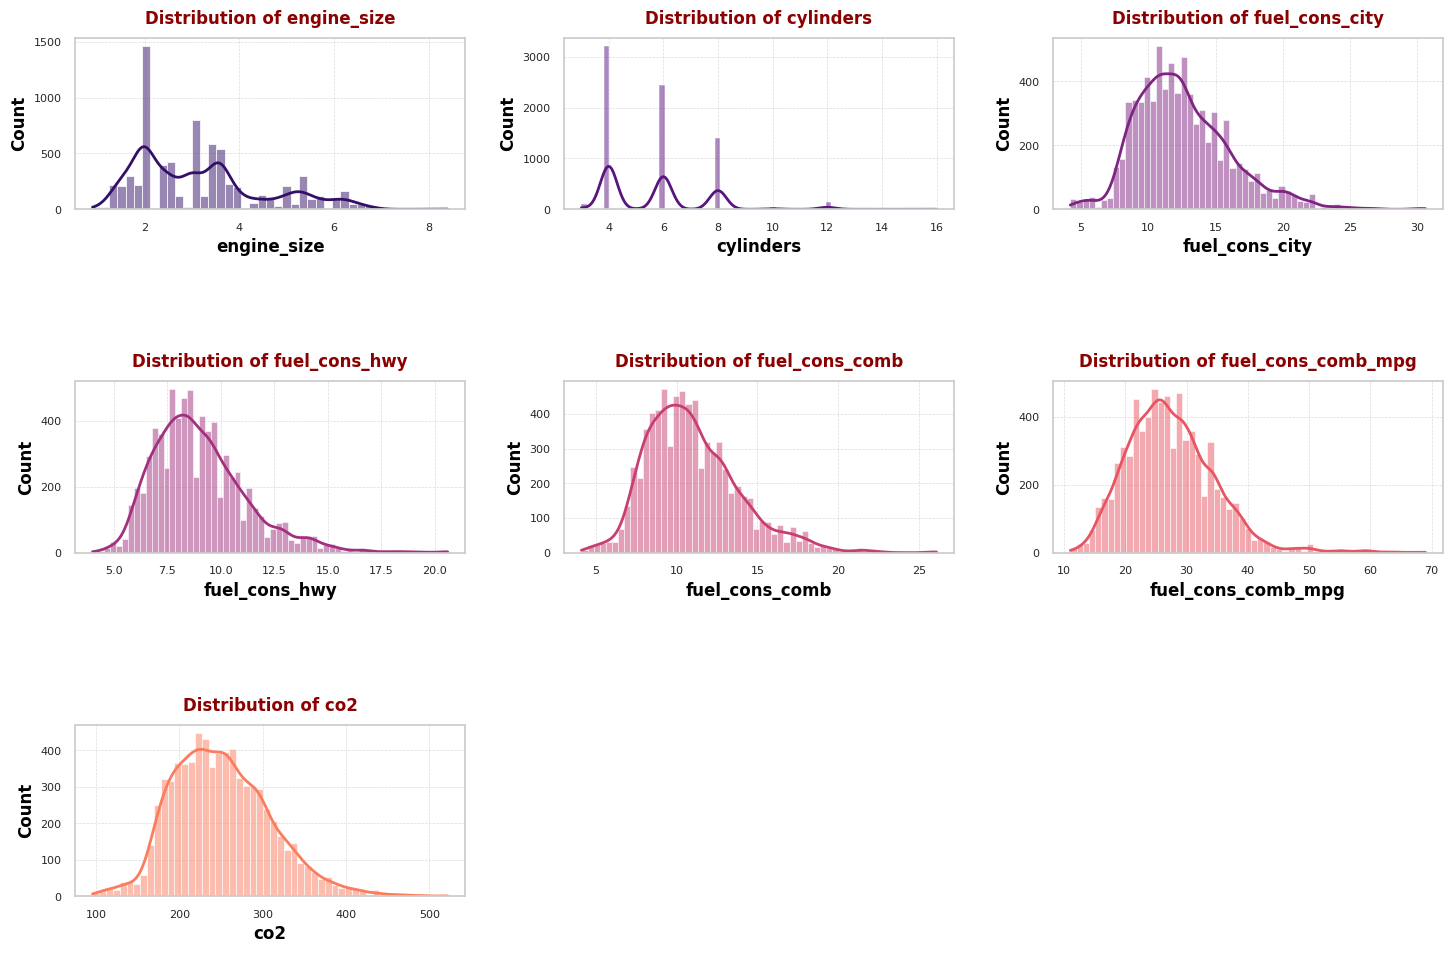

In [ ]:
import math

# Ustawienia estetyczne
sns.set_style("whitegrid")
palette = sns.color_palette("magma", n_colors=10)

# Wybór danych numerycznych
numerical_df = df.select_dtypes(include=['number'])

# Parametry wykresu
plt.figure(figsize=(15, 10))
num_vars = len(numerical_df.columns)
cols = 3  # Liczba kolumn subplotów
rows = math.ceil(num_vars / cols)  # Liczba wierszy

# Tworzenie wykresów
for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(
        data=numerical_df,
        x=var,
        kde=True,
        color=palette[i % len(palette)],
        line_kws={'linewidth': 2}
    )
    plt.title(f'Distribution of {var}', fontsize=12, fontweight='bold', color='darkred', pad=10)
    plt.xlabel(var, fontsize=12, labelpad=4, fontweight='bold', color='black')
    plt.ylabel('Count', fontsize=12, labelpad=4, fontweight='bold', color='black')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Dopasowanie układu
plt.tight_layout(pad=2.0)
plt.subplots_adjust(hspace=1)
plt.show()

>Wykres rozrzutu z dopasowaną linią regresji między rozmiarem silnika (engine_size) a emisją CO2 (co2)

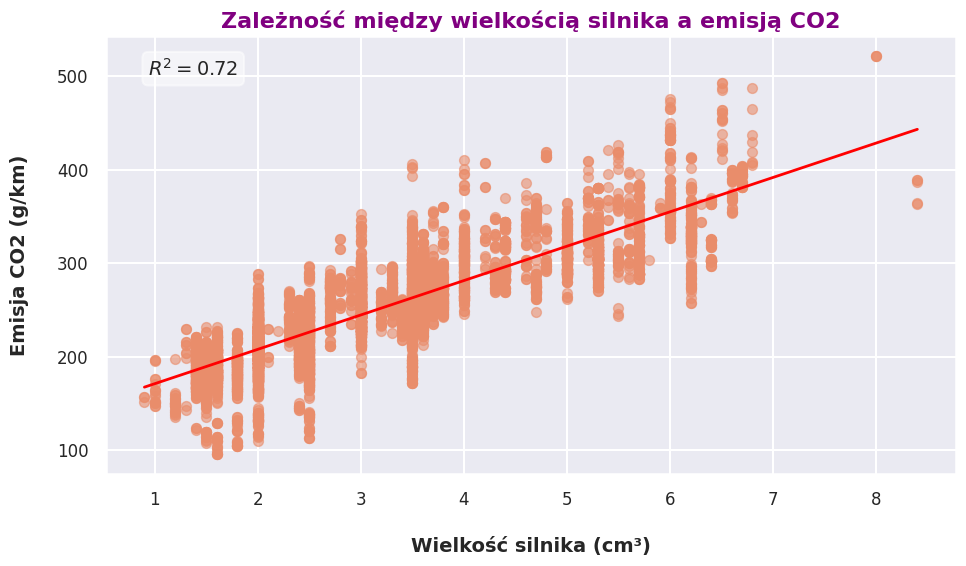

In [ ]:
# Sprawdza korelację między cechą niezależną (engine_size) i zmienną docelową (co2_emissions)

# Stylizacja wykresu
sns.set_theme(style="darkgrid", context="talk", palette='flare')

# Rysowanie wykresu regresji
plt.figure(figsize=(10, 6))
ax = sns.regplot(
    x='engine_size', y='co2', data=df, ci=None,
    scatter_kws={'alpha': 0.6, 's': 50},  # Przezroczystość i rozmiar markerów
    line_kws={'color': 'red', 'linewidth': 2}  # Wygląd linii regresji
)

# Dodanie tytułu i etykiet
plt.title('Zależność między wielkością silnika a emisją CO2', fontsize=16, weight='bold', color='purple')
plt.xlabel('Wielkość silnika (cm³)', fontsize=14, labelpad=20, weight='bold')
plt.ylabel('Emisja CO2 (g/km)', fontsize=14, labelpad=20, weight='bold')

# Dostosowanie osi
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Dodanie współczynnika determinacji (opcjonalnie)
from sklearn.linear_model import LinearRegression

X = df[['engine_size']]
y = df['co2']
model = LinearRegression().fit(X, y)
r_squared = model.score(X, y)

# Wyświetlenie współczynnika na wykresie
plt.text(
    0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=ax.transAxes,
    fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

# Finalizacja
plt.tight_layout()
plt.show()

>Dataframe df_encoded, w którym oryginalne kolumny z kategoriami zostają zastąpione przez kolumny z wartościami binarnymi (0 lub 1)
>Kolumny 'make', 'model', 'vehicle_class', 'transmission', 'fuel_type'

In [ ]:
# One-hot encoding dla zmiennych kategorycznych
df_encoded = pd.get_dummies(df, columns=['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'], drop_first=True)

----

```



```

### Modele Klasyczne

----

```

```

>Podział zbioru

In [ ]:
# Dzieli wybraną niezależną cechę (engine_size) i zmienną docelową (co2_emissions) dla prostej regresji liniowej.

X = df_encoded.drop('co2', axis=1)  # cechy
y = df_encoded['co2']  # zmienna docelowa

```

```

#### Pierwszy Model Klasyczny (Regresja Liniowa)

----

>Podział danych na dwa zbiory: treningowy (do uczenia modelu) i testowy (do oceny wydajności modelu)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>Przygotowanie modelu regresji liniowej

In [ ]:
from sklearn.linear_model import LinearRegression

model_simple_lin_reg = LinearRegression()

>>Trenowanie modelu regresji liniowej na danych treningowych X_train i y_train

In [ ]:
model_simple_lin_reg.fit(X_train, y_train)

LinearRegression()

>Przewidywanie za pomocą modelu regresji liniowej (model_simple_lin_reg) na danych treningowych (X_train) oraz danych testowych (X_test).

In [ ]:
# Przewidywanie przy użyciu modelu na danych testowych

y_train_pred = model_simple_lin_reg.predict(X_train)
y_pred = model_simple_lin_reg.predict(X_test)

>Wykres regresji, na którym przedstawia się zależność między prawdziwymi wartościami (y_test) a przewidywaniami modelu (y_pred).

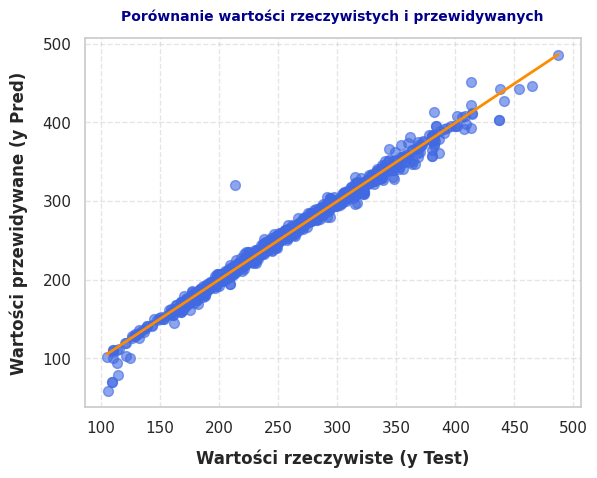

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.set(style="whitegrid")  # Ustawienie stylu na biały z siatką

sns.regplot(x=y_test, y=y_pred, ci=None, color="royalblue", scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'darkorange', 'lw': 2})

# Ustawienie etykiet osi i tytułu
plt.xlabel('Wartości rzeczywiste (y Test)', fontsize=12, weight='bold', labelpad=10)
plt.ylabel('Wartości przewidywane (y Pred)', fontsize=12, weight='bold', labelpad=10)
plt.title('Porównanie wartości rzeczywistych i przewidywanych', fontsize=10, weight='bold', pad=12 ,color='darkblue')

# Dostosowanie siatki
plt.grid(True, linestyle='--', alpha=0.5)

# Dopasowanie wielkości wykresu
plt.figure(figsize=(8, 6))

# Pokazanie wykresu
plt.show()

>Obliczanie różnych metryk oceny modelu regresyjnego, takich jak R² (współczynnik determinacji), MAE (średni błąd bezwzględny), MSE (średni błąd kwadratowy) oraz RMSE (pierwiastek średniego błędu kwadratowego), zarówno dla danych treningowych, jak i testowych.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "MAE" : mean_absolute_error(y_train, y_train_pred),
    "MSE" : mean_squared_error(y_train, y_train_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "MAE" : mean_absolute_error(y_test, y_pred),
    "MSE" : mean_squared_error(y_test, y_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

,linear_train,linear_test
R2,0.997503,0.989758
MAE,1.870056,3.273605
MSE,8.534808,35.228142
RMSE,2.921439,5.935330


```

```

----

```

```

#### Drugi Model Klasyczny

----

>Utworzenie modelu regresji k-najbliższych sąsiadów

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_knnr = KNeighborsRegressor()

>Inicjacja procesu uczenia modelu na zbiorze danych treningowych, gdzie model "uczy się" zależności między danymi wejściowymi (X_train) a etykietami (y_train)

In [ ]:
model_knnr.fit(X_train, y_train)

KNeighborsRegressor()

>Przewidywania wyników dla zbiorów treningowego (X_train) i testowego (X_test) przy użyciu wytrenowanego modelu KNN

In [ ]:
y_train_pred = model_knnr.predict(X_train)
y_test_pred = model_knnr.predict(X_test)

>Obliczanie różnych metryk oceny modelu regresyjnego, takich jak R² (współczynnik determinacji), MAE (średni błąd bezwzględny), MSE (średni błąd kwadratowy) oraz RMSE (pierwiastek średniego błędu kwadratowego), zarówno dla danych treningowych, jak i testowych.

In [ ]:
skr_score = train_val(y_train, y_train_pred, y_test, y_test_pred, 'knn_regressor')
skr_score

,knn_regressor_train,knn_regressor_test
R2,0.993766,0.990051
MAE,2.652370,3.396886
MSE,21.311381,34.219959
RMSE,4.616425,5.849783


```

```

----

```



```

----

```



```

### Modele Perceptronów Wielowarstwowych

----

>Podział zbioru

In [ ]:
# Przygotowanie danych
# Podzielenie danych na cechy (X) i cel (y)

X = df_encoded.drop(labels='co2', axis=1)
y = df_encoded['co2']

```


```

#### Perceptron Base

----

>Biblioteki

In [ ]:
import tensorflow as tf
import keras

>Podział danych na dwa zbiory: treningowy (do uczenia modelu) i testowy (do oceny wydajności modelu)

In [ ]:
# Podzielenie danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>>Skalowanie Danych

In [ ]:
# Opcjonalnie - skalowanie danych

# scaler = MinMaxScaler()
# scaler = StandardScaler()
# X_train_sc = scaler.fit_transform(X_train)
# X_test_sc = scaler.transform(X_test)

>Tworzenie modelu regresyjnego w TensorFlow, który składa się z dwóch warstw ukrytych i jednej warstwy wyjściowej.
>Model jest kompilowany z odpowiednimi ustawieniami funkcji straty, optymalizatora i metryki oceny.

In [ ]:
# Perceptron 1
tf.random.set_seed(42)
model_mlp_base = tf.keras.models.Sequential([
    keras.Input(shape=(X.shape[1],)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=keras.activations.relu),
    keras.layers.Dense(128, activation=keras.activations.relu),
    keras.layers.Dense(1)
])

model_mlp_base.compile(loss="mean_squared_error", optimizer="adam", metrics=["root_mean_squared_error"])

> Trenowanie modelu na danych X_train i y_train przez 80 epok, co oznacza, że model będzie starał się poprawić swoje przewidywania przez 80 pełnych iteracji po danych treningowych.

In [ ]:
# Trening i epoki
history = model_mlp_base.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test), verbose=1)

Epoch 1/80
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 28803.9531 - root_mean_squared_error: 162.7678 - val_loss: 517.2587 - val_root_mean_squared_error: 22.7433
Epoch 2/80
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 361.2326 - root_mean_squared_error: 18.9909 - val_loss: 244.5373 - val_root_mean_squared_error: 15.6377
Epoch 3/80
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 199.0609 - root_mean_squared_error: 14.1058 - val_loss: 166.5202 - val_root_mean_squared_error: 12.9043
Epoch 4/80
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 133.3269 - root_mean_squared_error: 11.5429 - val_loss: 120.9031 - val_root_mean_squared_error: 10.9956
Epoch 5/80
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 92.1996 - root_mean_squared_error: 9.5974 - val_loss: 88.9546 - val_root_mean_squared_error: 9.4316
Epoch 6/80
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 64.8163 - root_mean_squared_error: 8.0461 - val_loss: 68.3425 - val_root_mean_squared_error: 8.2670
Epoch 7/80
185/18

>Wykres, który przedstawia przebieg różnych metryk (straty i pierwiastka błędu średniokwadratowego) w trakcie treningu modelu, na przestrzeni 80 epok.

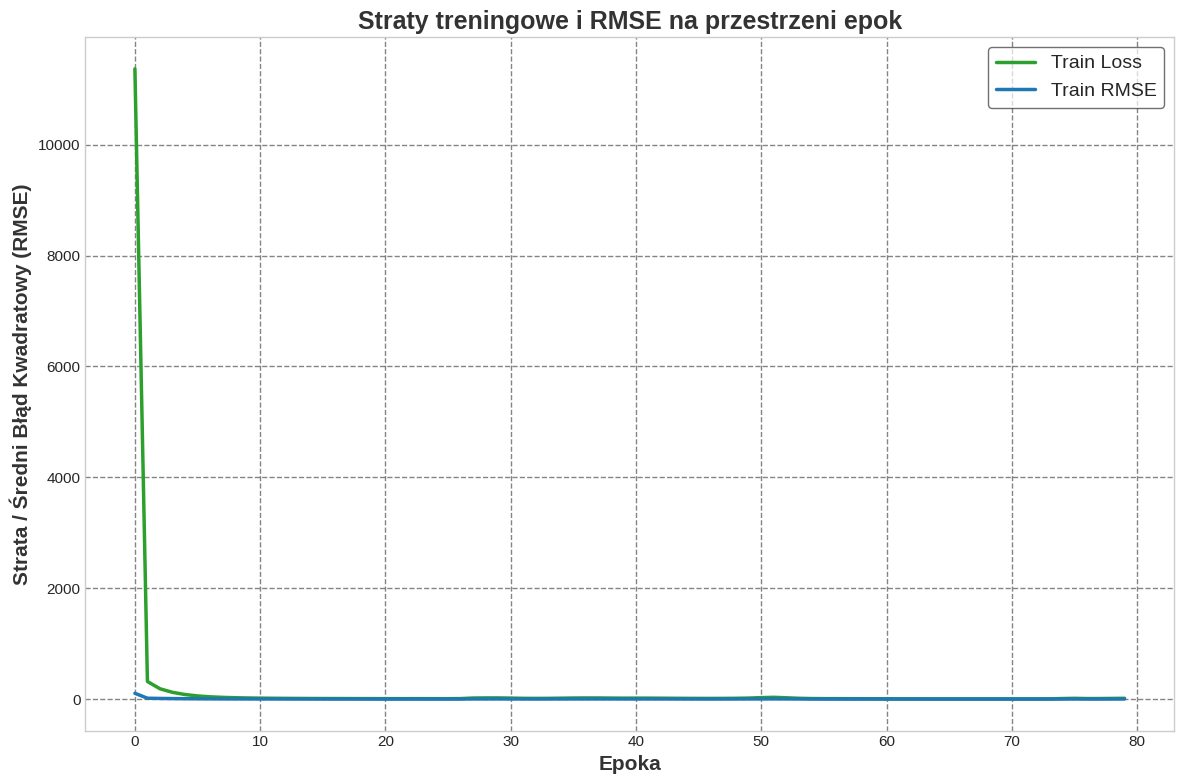

In [ ]:
# Rysowanie epok

# Ustawienie stylu wykresu
plt.style.use('seaborn-v0_8-whitegrid')

# Rysowanie epok
plt.figure(figsize=(12, 8))

# Dodanie wykresów
plt.plot(history.history['loss'], label='Train Loss', color='#2ca02c', linestyle='-', linewidth=2.5)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE', color='#1f77b4', linestyle='-', linewidth=2.5)

# Dodanie tytułu wykresu
plt.title('Straty treningowe i RMSE na przestrzeni epok', fontsize=18, fontweight='bold', color='#333333')

# Opis osi
plt.xlabel('Epoka', fontsize=15, fontweight='bold', color='#333333')
plt.ylabel('Strata / Średni Błąd Kwadratowy (RMSE)', fontsize=15, fontweight='bold', color='#333333')

# Ustawienie legendy
plt.legend(loc='upper right', fontsize=14, frameon=True, framealpha=0.7, facecolor='white', edgecolor='#333333')

# Poprawa wyglądu siatki
plt.grid(True, linestyle='--', alpha=0.6, color='#333333')

# Poprawienie marginesów, aby wykres się nie ścinał
plt.tight_layout()

# Pokazanie wykresu
plt.show()

>Przewidywania na zbiorach treningowym i testowym,ocena modelu(metryk oceny modelu regresyjnego, takich jak R² (współczynnik determinacji), MAE (średni błąd bezwzględny), MSE (średni błąd kwadratowy) oraz RMSE (pierwiastek średniego błędu kwadratowego)) za pomocą funkcji train_val, przechowującej wyniki w zmiennej smb

In [ ]:
# Ewaluacja modelu
y_train_pred = model_mlp_base.predict(X_train)
y_test_pred = model_mlp_base.predict(X_test)
smb_base = train_val(y_train, y_train_pred, y_test, y_test_pred, 'mlp_base')
smb_base

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,mlp_base_train,mlp_base_test
R2,0.996115,0.993214
MAE,3.041389,3.404882
MSE,13.282615,23.341719
RMSE,3.644532,4.831327


```

```

----

```

```

#### Perceptron optymalny

----

>Podział danych treningowych na dwie części: jedną do trenowania modelu, a drugą do walidacji.

In [ ]:
X_train, y_train, X_validate, y_validate = X_train[600:], y_train[600:], X_train[:600], y_train[:600]

>Skalowanie Danych

In [ ]:
# Opcjonalnie - skalowanie danych

# scaler = MinMaxScaler()
# scaler = StandardScaler()
# X_train_sc = scaler.fit_transform(X_train)
# X_test_sc = scaler.transform(X_test)
# X_validate_sc = scaler.transform(X_validate)

>Tworzenie modelu perceptronu z wieloma warstwami ukrytymi, z 96 lub 128 neuronami, funkcją aktywacyjną ReLU i regularizacją Dropout.
>Model jest następnie kompilowany z użyciem optymalizatora Adam i funkcji straty MSE, a także z miarą RMSE do oceny jego wydajności.

In [ ]:
# Perceptron 2
tf.random.set_seed(42)
model_mlp_opt = tf.keras.models.Sequential([keras.Input(shape=(X_train.shape[1],)),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(128, activation=keras.activations.sigmoid),
                                    keras.layers.Dropout(rate=0.25, seed=42),
                                    keras.layers.Dense(128, activation=keras.activations.selu),
                                    keras.layers.Dense(96, activation=keras.activations.sigmoid),
                                    keras.layers.Dropout(rate=0.25, seed=42),
                                    keras.layers.Dense(128, activation=keras.activations.relu),
                                    keras.layers.Dense(1)])

model_mlp_opt.compile(loss="mean_squared_error", optimizer="adam", metrics=["root_mean_squared_error"])

> Trening modelu z walidacją na danych walidacyjnych i zastosowanie waruneku stopu, który zatrzymuje trening, jeśli przez 4 epoki nie będzie poprawy w wynikach na danych walidacyjnych.

In [ ]:
# Trening z warunkiem stopu i walidacją
history_opt = model_mlp_opt.fit(X_train, y_train, batch_size=64,
                                epochs=80,
                                validation_data=(X_validate, y_validate), validation_freq=1,
                                callbacks=[keras.callbacks.EarlyStopping(patience=4)])

Epoch 1/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 57462.5039 - root_mean_squared_error: 239.3326 - val_loss: 19015.6133 - val_root_mean_squared_error: 137.8971
Epoch 2/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11659.0391 - root_mean_squared_error: 106.8128 - val_loss: 3402.3154 - val_root_mean_squared_error: 58.3294
Epoch 3/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3673.4170 - root_mean_squared_error: 60.6055 - val_loss: 3400.7478 - val_root_mean_squared_error: 58.3159
Epoch 4/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3666.7646 - root_mean_squared_error: 60.5502 - val_loss: 3400.7644 - val_root_mean_squared_error: 58.3161
Epoch 5/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3733.4119 - root_mean_squared_error: 61.0950 - val_loss: 3400.5059 - val_root_mean_squared_error: 58.3139
Epoch 6/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3701.7417 - root_mean_squared_error: 60.8369 - val_loss: 3395.7234 - val_root_mean_squared_error: 58.2728
Epoch 7/

>Wykres danych treningowych modelu (np.strata w zależności od epoki,  pierwiastka błędu średniokwadratowego,...)

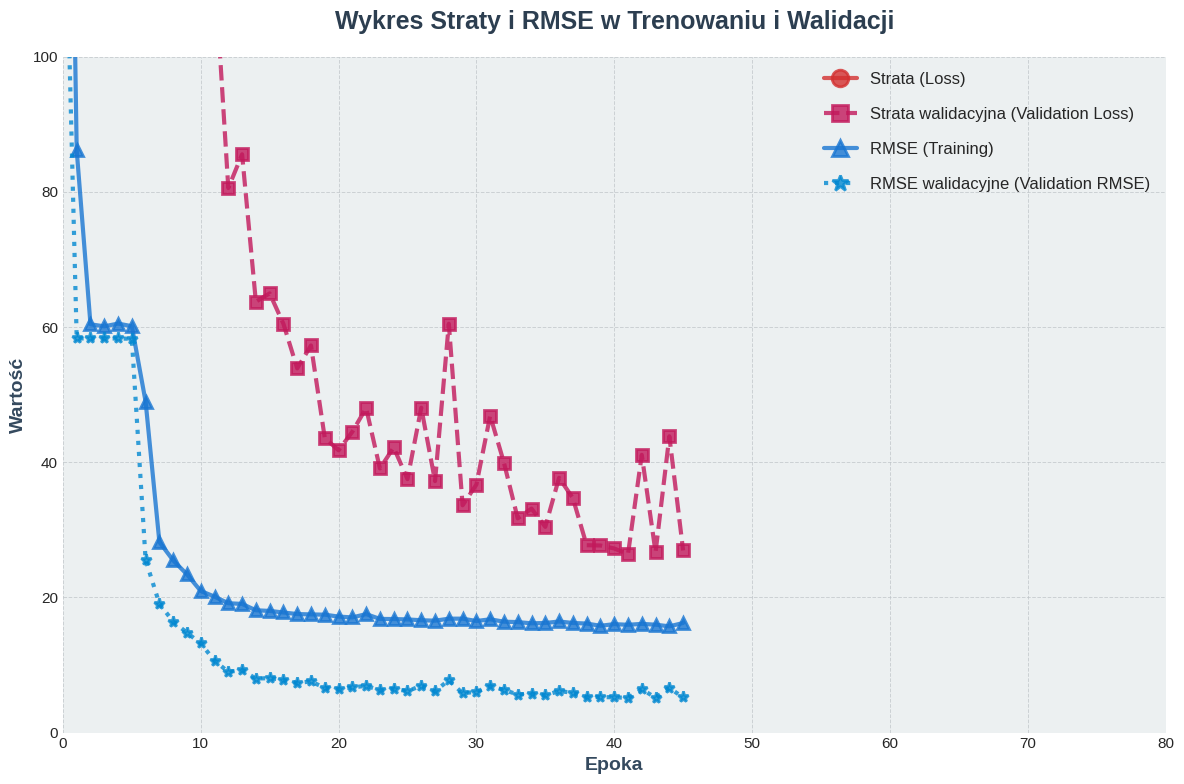

In [ ]:
# Tworzenie DataFrame z historii treningu
history_df = pd.DataFrame(history_opt.history)

# Ustawienia ogólne wykresu
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-darkgrid')

# Rysowanie epok z ulepszonymi liniami i markerami
plt.plot(history_df.index, history_df['loss'], color='#D32F2F', linestyle='-', label='Strata (Loss)', linewidth=3, marker='o', markersize=8, markerfacecolor='#D32F2F', markeredgewidth=2, alpha=0.8)
plt.plot(history_df.index, history_df['val_loss'], color='#C2185B', linestyle='--', label='Strata walidacyjna (Validation Loss)', linewidth=3, marker='s', markersize=8, markerfacecolor='#C2185B', markeredgewidth=2, alpha=0.8)
plt.plot(history_df.index, history_df['root_mean_squared_error'], color='#1976D2', linestyle='-', label='RMSE (Training)', linewidth=3, marker='^', markersize=8, markerfacecolor='#1976D2', markeredgewidth=2, alpha=0.8)
plt.plot(history_df.index, history_df['val_root_mean_squared_error'], color='#0288D1', linestyle=':', label='RMSE walidacyjne (Validation RMSE)', linewidth=3, marker='*', markersize=8, markerfacecolor='#0288D1', markeredgewidth=2, alpha=0.8)

# Dodanie tytułu, etykiet i legendy
plt.title('Wykres Straty i RMSE w Trenowaniu i Walidacji', fontsize=18, weight='bold', color='#2C3E50', loc='center', pad=20)
plt.xlabel('Epoka', fontsize=14, weight='bold', color='#34495E')
plt.ylabel('Wartość', fontsize=14, weight='bold', color='#34495E')

# Dodanie legendy z przejrzystością
plt.legend(loc='best', fontsize=12, frameon=False, labelspacing=1.2, markerscale=1.5)

# Formatowanie osi
plt.xlim(0, 80)
plt.ylim(0, 100)

# Siatka i styl
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='#BDC3C7', alpha=0.7)

# Ulepszony wygląd tła
plt.gca().set_facecolor('#ECF0F1')

# Dodanie subtelnego cienia do linii
for line in plt.gca().get_lines():
    line.set_zorder(10)

# Dostosowanie układu
plt.tight_layout()

# Pokazanie wykresu
plt.show()

>Przewidywanie wartości dla zbioru treningowego i testowego, ocena jakość modelu za pomocą funkcji train_val, która oblicza różne metryki ewaluacyjne
>(metryk oceny modelu regresyjnego, takich jak R² (współczynnik determinacji), MAE (średni błąd bezwzględny), MSE (średni błąd kwadratowy) oraz RMSE (pierwiastek średniego błędu kwadratowego))

In [ ]:
# Ewaluacja modelu
y_train_pred = model_mlp_opt.predict(X_train)
y_test_pred = model_mlp_opt.predict(X_test)
smo_opt = train_val(y_train, y_train_pred, y_test, y_test_pred, 'mlp_opt')
smo_opt

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,mlp_opt_train,mlp_opt_test
R2,0.995033,0.990079
MAE,2.898571,3.923161
MSE,16.989112,34.124637
RMSE,4.121785,5.841630


```

```

----

```



```

### Podsumowanie Metryk Modeli

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Poprawne przypisanie kolumn modelu
model_column_mapping = {
    'Linear Regression': ['linear_train', 'linear_test'],
    'KNN Regressor': ['knn_regressor_train', 'knn_regressor_test'],
    'MLP Base': ['mlp_base_train', 'mlp_base_test'],
    'MLP Optimized': ['mlp_opt_train', 'mlp_opt_test']
}

# Zbieranie wyników z funkcji train_val dla każdego modelu
models = {
    'Linear Regression': slr_score,
    'KNN Regressor': skr_score,
    'MLP Base': smb_base,
    'MLP Optimized': smo_opt
}

# Tworzenie listy wyników dla każdego modelu
metrics = {
    'Model': [],
    'R2_train': [],
    'R2_test': [],
    'MAE_train': [],
    'MAE_test': [],
    'MSE_train': [],
    'MSE_test': [],
    'RMSE_train': [],
    'RMSE_test': []
}

# Iteracja przez modele i zbieranie metryk
for model_name, model_result in models.items():
    model_train, model_test = model_column_mapping[model_name]

    # Dodawanie danych do metryk
    metrics['Model'].append(model_name)
    metrics['R2_train'].append(model_result.loc['R2', model_train])
    metrics['R2_test'].append(model_result.loc['R2', model_test])
    metrics['MAE_train'].append(model_result.loc['MAE', model_train])
    metrics['MAE_test'].append(model_result.loc['MAE', model_test])
    metrics['MSE_train'].append(model_result.loc['MSE', model_train])
    metrics['MSE_test'].append(model_result.loc['MSE', model_test])
    metrics['RMSE_train'].append(model_result.loc['RMSE', model_train])
    metrics['RMSE_test'].append(model_result.loc['RMSE', model_test])

# Tworzenie DataFrame z metrykami
metrics_df = pd.DataFrame(metrics)

print("Metryki Modeli:")
print(metrics_df)

Metryki Modeli:
               Model  R2_train   R2_test  MAE_train  MAE_test  MSE_train  \
0  Linear Regression  0.997503  0.989758   1.870056  3.273605   8.534808   
1      KNN Regressor  0.993766  0.990051   2.652370  3.396886  21.311381   
2           MLP Base  0.996115  0.993214   3.041389  3.404882  13.282615   
3      MLP Optimized  0.995033  0.990079   2.898571  3.923161  16.989112   

    MSE_test  RMSE_train  RMSE_test  
0  35.228142    2.921439   5.935330  
1  34.219959    4.616425   5.849783  
2  23.341719    3.644532   4.831327  
3  34.124637    4.121785   5.841630  


```



```

----